In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("project_train.csv")
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName,NUM_RAND
0,69173058,Senior Support Worker,Senior Support Worker Wanted A senior suppor...,"Taunton, Somerset Somerset South West",Taunton,NaN,permanent,BROOK STREET BUREAU Bristol Care,Healthcare & Nursing Jobs,15931 - 17082 per annum,16506,totaljobs.com,0.267847
1,72450873,Statistical / Mathematical Modeller in Pharmac...,Statistical / Mathematical Modeller in Pharmac...,North West,North West London,NaN,permanent,SCI Recruitment for Scientists,Scientific & QA Jobs,"From 30,000 to 40,000 per annum 30-40K",35000,totaljobs.com,0.557455
2,68364211,EMC Team Leader (DEF STAN),The Opportunity My client is currently seeking...,Surrey,Surrey,NaN,permanent,ADV Technical Services Limited,Engineering Jobs,45k + Bonus + Pension,45000,justengineers.net,0.529918
3,69556873,"Core Java Engineer London, Big Data","Core Java Engineer London, Big Data, MySQL, N...",UK London,London,NaN,permanent,Engage PSG,IT Jobs,"55000 - 70000 per annum + Bens, Bonus (up to 2...",62500,careers4a.com,0.163741
4,71304393,driver,"**** driver reqd for busy parcel round, experi...",Brentwood,Brentwood,full_time,NaN,K & C Despatch,Logistics & Warehouse Jobs,350.00 - 400.00 per week,18000,Jobcentre Plus,0.884189


In [3]:
data.describe()

,Id,SalaryNormalized,NUM_RAND
count,5.999800e+04,59998.000000,59998.000000
mean,6.970365e+07,34005.098237,0.500709
std,3.109205e+06,17577.106859,0.288268
min,1.261263e+07,5000.000000,0.000003
25%,6.869579e+07,21500.000000,0.251659
50%,6.993757e+07,30000.000000,0.500822
75%,7.162840e+07,42500.000000,0.750809
max,7.270524e+07,200000.000000,0.999997


/Users/hrishitelang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

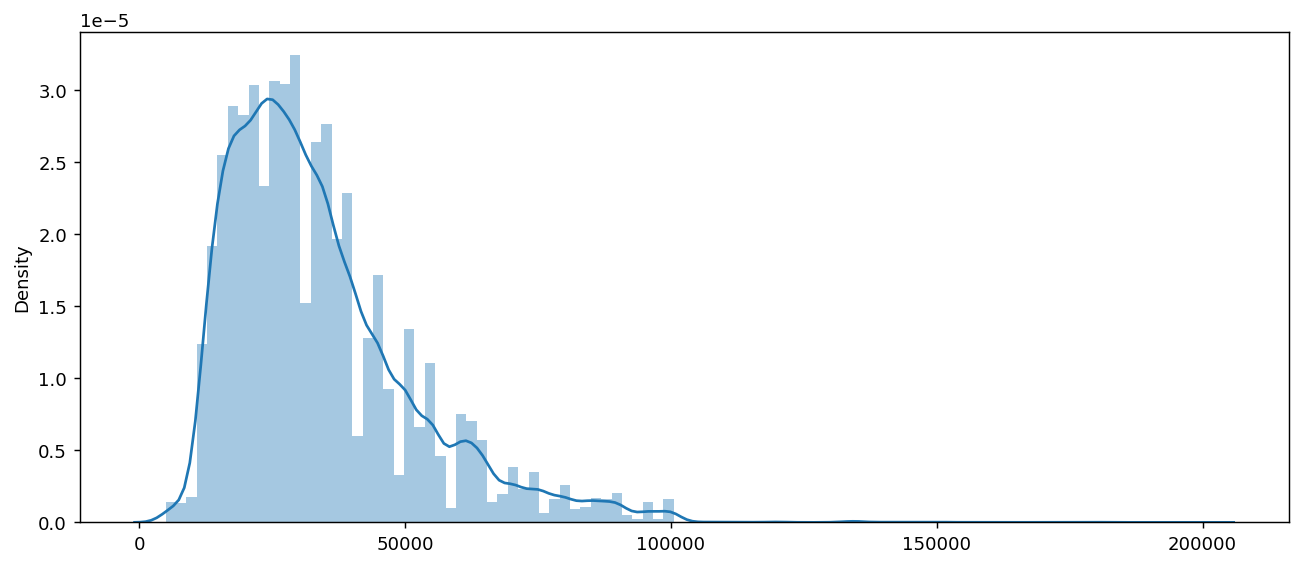

In [4]:
plt.figure(figsize=(12,5), dpi=130)
sns.distplot(x=data['SalaryNormalized'], bins=100)

In [5]:
# Randomly selecting 2500 rows to train the classifier
import random
random.seed(1)
indices = list(data.index.values)
random_2500 = random.sample(indices,2500)

# Subsetting the train data based on the random indices
sample = data.loc[random_2500].reset_index()

Text(0.5, 1.0, 'Histogram of Salaries')

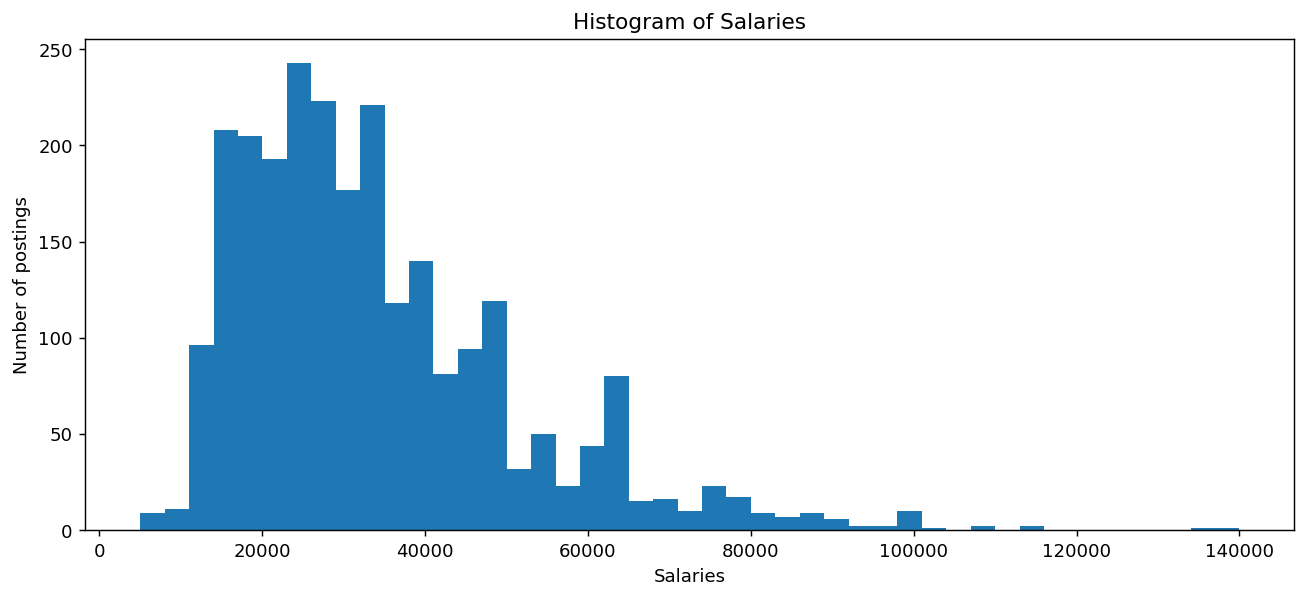

In [6]:
plt.figure(figsize=(12,5), dpi=130)
plt.hist(sample['SalaryNormalized'], bins='auto')
plt.xlabel('Salaries')
plt.ylabel('Number of postings')
plt.title('Histogram of Salaries')

# 1. What are the top 5 parts of speech in the job descriptions? How frequently do they appear?

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hrishitelang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 
from string import punctuation
import collections

In [8]:
# To obtain the full width of a cell in a dataframe
pd.set_option('display.max_colwidth', -1)
desc = data.loc[1,'After removing stopwords, there are two important observations in comparison to the previous result

Prepositions and determiners disappeared from the top 5 set as most of these are present in the stopwords imported from NLTK
The counts of nouns and plural nouns have decreased and the adjectives have increased.
Verb, gerund or present participle(VBG) and Verb, non-3rd person singular present(VBP) moved to the top 5 list']

# Creating a list of words from all the job descriptions in train_df1 data
all_desc = []
for i in range(0,data.shape[0]):
    desc = data.loc[i,'FullDescription']
    desc1 = desc.lower()
    # Removing numbers, *** and www links from the data
    desc2 = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',desc1)
    # Removing punctuation
    for p in punctuation:
        desc2 = desc2.replace(p,'')
    all_desc.append(desc2)

/var/folders/dy/3d1m83kd219bvfl0ygpsjcd80000gn/T/ipykernel_24297/3786174579.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hrishitelang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
# Creating word tokens for all the descriptions
final_list = []
for desc in all_desc:
    word_list = word_tokenize(desc)
    final_list.extend(word_list)

In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hrishitelang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [11]:
import nltk
# 3. Tagging parts of speech
pos_tagged = nltk.pos_tag(final_list)

# 4. Identifying the most common parts of speech
tag_fd = nltk.FreqDist(tag for (word, tag) in pos_tagged)
tag_fd.most_common()[:10]

[('NN', 3328920),
 ('JJ', 1501159),
 ('IN', 1377394),
 ('DT', 1093017),
 ('NNS', 1082790),
 ('VB', 702013),
 ('CC', 656927),
 ('VBG', 488373),
 ('TO', 432236),
 ('VBP', 329925)]

# 2. How do these numbers change if you exclude stopwords?

In [12]:
# Excluding stopwords from the analysis
list_wo_stopwords = []
for w in final_list:
    if w not in stop_words:
        list_wo_stopwords.append(w)
        
# 3. Tagging parts of speech
pos_tagged_wo_sw = nltk.pos_tag(list_wo_stopwords)

# 4. Identifying the most common parts of speech
tag_fd_wo_sw = nltk.FreqDist(tag for (word, tag) in pos_tagged_wo_sw)
tag_fd_wo_sw.most_common()[:10]

[('NN', 3226148),
 ('JJ', 1553326),
 ('NNS', 1069511),
 ('VBG', 550203),
 ('VBP', 368583),
 ('RB', 284362),
 ('VBD', 169385),
 ('VBN', 163728),
 ('VB', 163504),
 ('IN', 125710)]

In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hrishitelang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatization without specifying parts of speech
list_lemmatized = []
for word in list_wo_stopwords:
    list_lemmatized.append(lemmatizer.lemmatize(word))

word_freq_lem = dict(collections.Counter(list_lemmatized))
keys = list(word_freq_lem.keys())
values = list(word_freq_lem.values())
df_lem = pd.DataFrame({'words':keys,'freq':values})
display(df_lem.sort_values(by = 'freq',ascending = False)[:10])

,words,freq
24,experience,92336
42,role,68976
115,team,66979
77,client,63068
110,work,62569
403,business,59998
5,service,53074
164,skill,51527
202,working,47984
492,manager,46180


In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
!pip install wordcloud

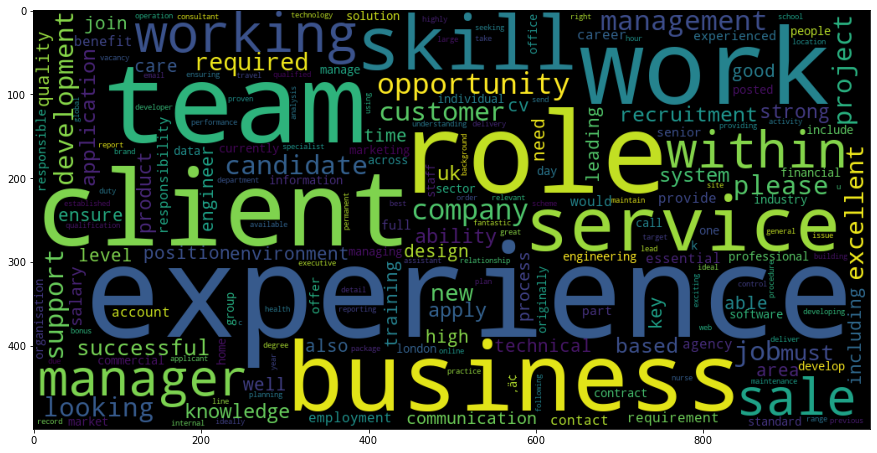

In [15]:
from wordcloud import WordCloud
from collections import Counter
word_could_dict=Counter(word_freq_lem)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

# Model without text variables

In [16]:
p_75 = np.percentile(data['SalaryNormalized'], 75)
data['target'] = data['SalaryNormalized'].apply(lambda x: 1 if x>=p_75 else 0)

In [17]:
costly_cities = ['London','Brighton','Edinburgh','Bristol','Southampton','Portsmouth','Exeter','Cardiff','Manchester',
                 'Birmingham','Leeds','Aberdeen','Glasgow','Newcastle','Sheffield','Liverpool']
costly_cities_lower = [x.lower() for x in costly_cities]

# More robust if lower() is applied
data['location_flag'] = data['LocationNormalized'].apply(lambda x: 1 if x in costly_cities else 0)

In [18]:
# Dropping job description column from the dataset
train_x = data.drop(['FullDescription','Id','LocationRaw','Title','Company','LocationNormalized','SalaryRaw','SalaryNormalized',
                    'target'],axis=1)

train_x1 = pd.get_dummies(train_x,drop_first=True)
X_n = np.array(train_x1)
y_n = np.array(data['target'])

from sklearn.model_selection import train_test_split
X_train_num, X_val_num, y_train_num, y_val_num = train_test_split(X_n, y_n, test_size=0.3, random_state=1)

In [19]:
train_x.columns

Index(['ContractType', 'ContractTime', 'Category', 'SourceName', 'NUM_RAND',
       'location_flag'],
      dtype='object')

In [20]:
train_x1

,NUM_RAND,location_flag,ContractType_part_time,ContractTime_permanent,Category_Admin Jobs,Category_Charity & Voluntary Jobs,Category_Consultancy Jobs,Category_Creative & Design Jobs,Category_Customer Services Jobs,Category_Domestic help & Cleaning Jobs,...,SourceName_tntjobs.co.uk,SourceName_totaljobs.com,SourceName_traveljobsearch.com,SourceName_uksport.gov.uk,SourceName_ukstaffsearch.com,SourceName_wikijob.co.uk,SourceName_wileyjobnetwork.com,SourceName_windindustryjobs.com,SourceName_workthing.com,SourceName_zartis.com
0,0.267847,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.557455,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0.529918,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.163741,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.884189,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59993,0.602224,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59994,0.382125,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
59995,0.769690,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0.924055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Bernoulli
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train_num, y_train_num)

from sklearn import metrics
prediction_train = clf.predict(X_val_num)
mat_n = metrics.confusion_matrix(y_val_num, prediction_train)
mat_n
print (metrics.accuracy_score(y_val_num, prediction_train))

0.7627777777777778


In [22]:
# Baseline accuracy
1-(sum(y_val_num)/len(y_val_num))
# sum(prediction_train)

0.7472222222222222

In [23]:
# Counting the occurence of each word in the corpus
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(all_desc)
count_vect.get_feature_names()
X_matrix= X_train_counts.todense()
y = np.array(data['target'])

In [25]:
X_matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [27]:
# Creating the train and test split
from sklearn.model_selection import train_test_split
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_counts, y, test_size=0.3, random_state=1)

#Multinomial
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_m, y_train_m)
labels_m = clf.predict(X_val_m)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
mat_m = confusion_matrix(y_val_m, labels_m)

print ('Confusion matrix:\n',mat_m)
print ('Accuracy using MultinomialNB:',accuracy_score(y_val_m, labels_m))

Confusion matrix:
 [[10898  2552]
 [ 1172  3378]]
Accuracy using MultinomialNB: 0.7931111111111111


In [29]:
# Removing stopwords
def remove_stopwords(s):
    big_regex = re.compile(r'\b%s\b' % r'\b|\b'.join(map(re.escape, stop_words)))
    return big_regex.sub('',s)

all_desc_wo_sw = [remove_stopwords(s) for s in all_desc]

In [31]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(all_desc_wo_sw)
count_vect.get_feature_names()
X_matrix= X_train_counts.todense()
y = np.array(data['target'])

In [32]:
# Creating the train and test split
from sklearn.model_selection import train_test_split
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_counts, y, test_size=0.3, random_state=1)

#Multinomial
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_m, y_train_m)
labels_m = clf.predict(X_val_m)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
mat_m = confusion_matrix(y_val_m, labels_m)

print ('Confusion matrix:\n',mat_m)
print ('Accuracy using MultinomialNB:',accuracy_score(y_val_m, labels_m))

Confusion matrix:
 [[10878  2572]
 [ 1124  3426]]
Accuracy using MultinomialNB: 0.7946666666666666


In [37]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None 

# Lemmatizing the data
all_desc_lemm = []
for i in range(0,len(all_desc_wo_sw)):
    desc = all_desc_wo_sw[i]
    desc2 = re.sub('[0-9]+\S+|\s\d+\s|\w+[0-9]+|\w+[\*]+.*|\s[\*]+\s|www\.[^\s]+','',desc)
    for p in punctuation:
        desc2 = desc2.replace(p,'')
    tagged = nltk.pos_tag(word_tokenize(desc2))
    list_lemmatized = []
    for word, tag in tagged:
        wntag = get_wordnet_pos(tag)
        if wntag is None:# not supply tag in case of None
            list_lemmatized.append(lemmatizer.lemmatize(word)) 
        else:
            list_lemmatized.append(lemmatizer.lemmatize(word, pos=wntag))
    k = ' '.join(list_lemmatized)   
    all_desc_lemm.append(k)

In [35]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(all_desc_lemm)
count_vect.get_feature_names()
X_matrix= X_train_counts.todense()
y = np.array(data['target'])

In [36]:
# Creating the train and test split
from sklearn.model_selection import train_test_split
X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_train_counts, y, test_size=0.3, random_state=1)

#Multinomial
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_m, y_train_m)
labels_m = clf.predict(X_val_m)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
mat_m = confusion_matrix(y_val_m, labels_m)

print ('Confusion matrix:\n',mat_m)
print ('Accuracy using MultinomialNB:',accuracy_score(y_val_m, labels_m))

Confusion matrix:
 [[10899  2551]
 [ 1170  3380]]
Accuracy using MultinomialNB: 0.7932777777777777
